In [1]:
import pandas as pd
import geopandas as gpd
#import requests
import fiona
import datetime as dt
import folium
import geoplot
import descartes
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df=pd.read_pickle('burglaries.pickle')

In [3]:
neighborhoods_url='https://opendata.arcgis.com/datasets/055ca54e5fcc47329f081c9ef51d038e_0.geojson'
neighborhoods=gpd.read_file(neighborhoods_url)

In [4]:
pd.DatetimeIndex(df.beginDate).year.value_counts()

2014    4041
2017    3722
2015    3478
2019    3330
2016    3317
2018    2932
2020     351
2013      21
2012       1
Name: beginDate, dtype: int64

In [5]:
df.count()

beginDate    21193
offense      21193
geometry     21193
dtype: int64

In [6]:
df=df[df.geometry.bounds.minx<0]

In [8]:
df

,beginDate,geometry
4,2019-08-10 00:00:00,POINT (-93.30521 44.94843)
10,2019-08-22 00:00:00,POINT (-93.26756 44.92604)
27,2019-08-24 00:00:00,POINT (-93.29213 44.92228)
33,2019-08-24 00:00:00,POINT (-93.26502 44.97449)
44,2019-08-23 00:00:00,POINT (-93.21265 44.90810)
...,...,...
129659,2014-11-12 13:00:00,POINT (-93.28926 45.01042)
129669,2014-11-12 17:41:00,POINT (-93.28941 44.94567)
129674,2014-11-12 12:30:00,POINT (-93.24988 44.93502)
129678,2014-11-13 03:47:00,POINT (-93.22428 44.96904)


In [9]:
df_sjoined = gpd.sjoin(df, neighborhoods, op="within")

In [14]:
grouped = df_sjoined.groupby('BDNAME').size()
df_map = grouped.to_frame().reset_index()
df_map.columns = ['BDNAME', 'CASE_COUNT']

In [15]:
df_map.sort_values('CASE_COUNT')

,BDNAME,CASE_COUNT
34,Humboldt Industrial Area,12
7,Camden Industrial,14
76,University of Minnesota,45
57,Nicollet Island - East Bank,47
38,Kenwood,55
...,...,...
66,Seward,519
63,Powderhorn Park,627
35,Jordan,627
49,Marcy Holmes,671


In [12]:
merged_areas = neighborhoods.merge(df, on='BDNAME', how='outer')

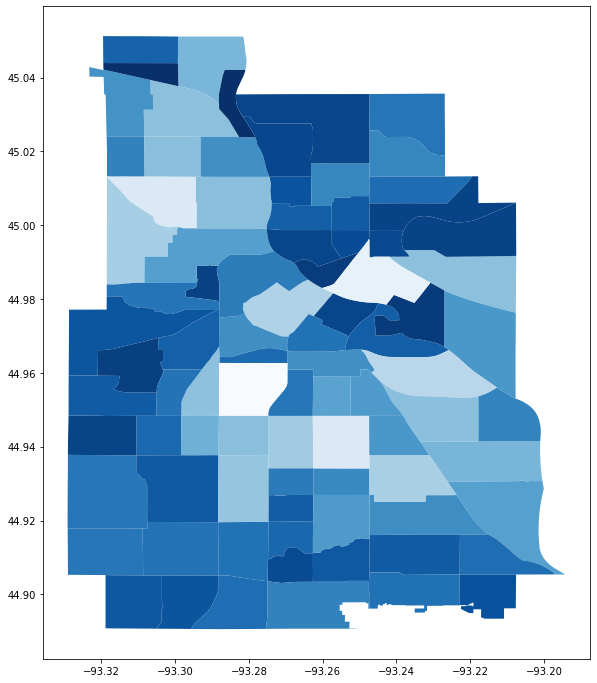

In [13]:
merged_areas.plot(column='CASE_COUNT', cmap="Blues_r", figsize=(12,12))

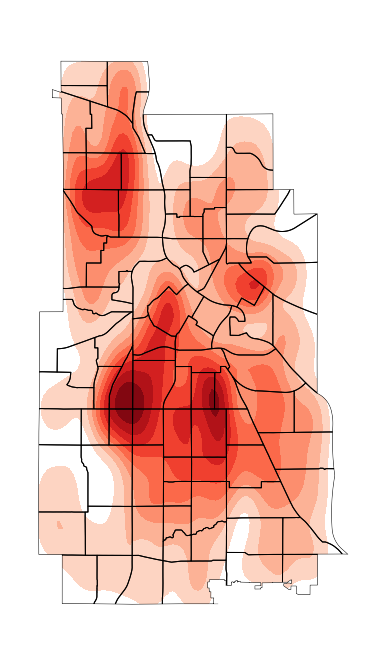

In [7]:
ax = geoplot.kdeplot(
    df, clip=neighborhoods.geometry,
    shade=True, cmap='Reds', figsize=(12,12),
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(neighborhoods, ax=ax, zorder=1)

Domestic

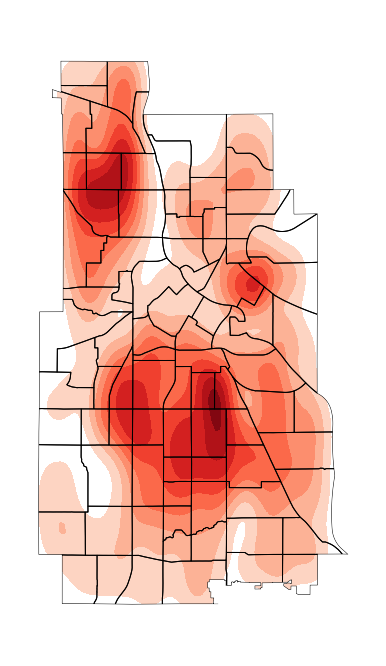

In [8]:
ax = geoplot.kdeplot(
    df[df.offense=='burgd'], clip=neighborhoods.geometry,
    shade=True, cmap='Reds', figsize=(12,12),
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(neighborhoods, ax=ax, zorder=1)

Business

In [9]:
df.head()

,beginDate,offense,geometry
4,2019-08-10,burgd,POINT (-93.30521 44.94843)
10,2019-08-22,burgd,POINT (-93.26756 44.92604)
27,2019-08-24,burgd,POINT (-93.29213 44.92228)
33,2019-08-24,burgb,POINT (-93.26502 44.97449)
44,2019-08-23,burgd,POINT (-93.21265 44.90810)


In [17]:
df.index=df.beginDate

In [24]:
df=df.loc[sorted(df.index)]

In [41]:
list(range(1,4))

[1, 2, 3]

In [43]:
len(df)

78301

In [44]:
df.index=list(range(0,len(df)))

In [25]:
ax = geoplot.kdeplot(
    df[df.offense=='burgb'], clip=neighborhoods.geometry,
    shade=True, cmap='Reds', figsize=(12,12),
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(neighborhoods, ax=ax, zorder=1)

,beginDate,offense,geometry
beginDate,,,
2012-07-15 12:00:00,2012-07-15 12:00:00,burgd,POINT (-93.25001 45.01497)
2013-01-05 12:30:00,2013-01-05 12:30:00,burgd,POINT (-93.21663 44.92154)
2013-08-01 00:00:00,2013-08-01 00:00:00,burgb,POINT (-93.25557 44.95913)
2013-10-18 12:00:00,2013-10-18 12:00:00,burgd,POINT (-93.30344 45.03441)
2013-10-25 12:00:00,2013-10-25 12:00:00,burgd,POINT (-93.26106 44.96718)
...,...,...,...
2020-03-08 00:00:00,2020-03-08 00:00:00,burgd,POINT (-93.26650 44.91352)
2020-03-09 00:00:00,2020-03-09 00:00:00,burgd,POINT (-93.27407 44.92238)
2020-03-09 00:00:00,2020-03-09 00:00:00,burgb,POINT (-93.25873 44.93684)


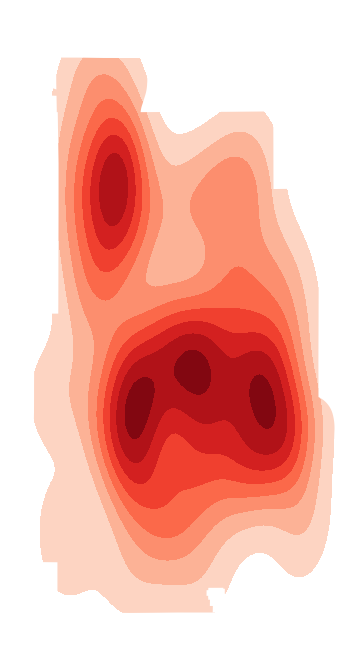

In [51]:
geoplot.kdeplot(df.loc[500:1000,:],clip=neighborhoods.geometry,
    shade=True, cmap='Reds', figsize=(12,12),
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(neighborhoods, ax=ax, zorder=1)

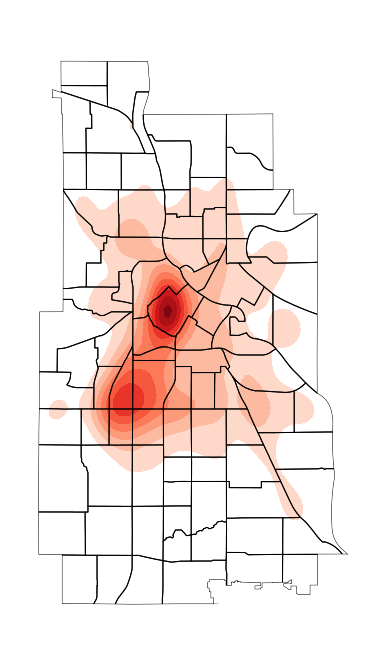

In [24]:
ax = geoplot.kdeplot(
    df[df.offense=='burgb'], clip=neighborhoods.geometry,
    shade=True, cmap='Reds', figsize=(12,12),
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(neighborhoods, ax=ax, zorder=1)